In [1]:
!pip install torch torchvision torchaudio

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784, 128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128, 64)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(64,10)

  def forward(self,x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    return x

In [56]:
transform = transforms.ToTensor() # converts images to tensors
train_data = datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

In [60]:
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [61]:
import torch
import torch.nn.functional as F

num_epochs = 8

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for batchidx, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

    if ((batchidx + 1) % 250 == 0):
          print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batchidx+1}/{len(train_loader)}], "
                f"Loss: {loss.item():.4f}, Accuracy: {100 * correct / total:.2f}%")

  epoch_loss = running_loss / len(train_loader)
  epoch_acc = 100. * correct / total
  print(f"Epoch {epoch+1} finished - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%\n")


Epoch [1/8], Step [250/938], Loss: 0.4763, Accuracy: 72.84%
Epoch [1/8], Step [500/938], Loss: 0.4332, Accuracy: 77.51%
Epoch [1/8], Step [750/938], Loss: 0.3658, Accuracy: 79.43%
Epoch 1 finished - Loss: 0.5588, Accuracy: 80.46%

Epoch [2/8], Step [250/938], Loss: 0.5831, Accuracy: 85.34%
Epoch [2/8], Step [500/938], Loss: 0.5407, Accuracy: 85.52%
Epoch [2/8], Step [750/938], Loss: 0.4616, Accuracy: 85.81%
Epoch 2 finished - Loss: 0.3959, Accuracy: 85.84%

Epoch [3/8], Step [250/938], Loss: 0.2147, Accuracy: 86.84%
Epoch [3/8], Step [500/938], Loss: 0.2390, Accuracy: 87.15%
Epoch [3/8], Step [750/938], Loss: 0.3027, Accuracy: 87.14%
Epoch 3 finished - Loss: 0.3512, Accuracy: 87.19%

Epoch [4/8], Step [250/938], Loss: 0.3831, Accuracy: 88.38%
Epoch [4/8], Step [500/938], Loss: 0.2723, Accuracy: 88.19%
Epoch [4/8], Step [750/938], Loss: 0.4390, Accuracy: 88.06%
Epoch 4 finished - Loss: 0.3270, Accuracy: 88.04%

Epoch [5/8], Step [250/938], Loss: 0.2852, Accuracy: 88.70%
Epoch [5/8], Ste

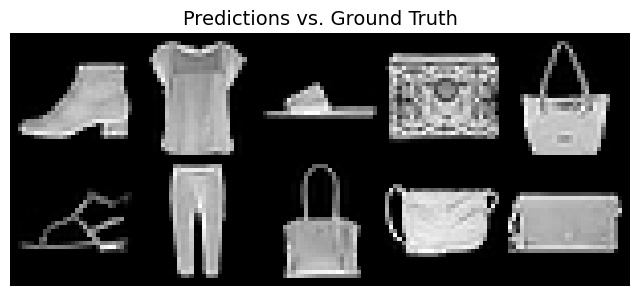

Predicted: [9, 6, 5, 8, 8, 5, 1, 8, 8, 8]
Actual:    [9, 6, 5, 8, 8, 5, 1, 8, 8, 8]


In [62]:
import matplotlib.pyplot as plt
import torchvision

model.eval()

with torch.no_grad():
  sample_imgs, sample_labels = next(iter(train_loader))
  sample_img, sample_label = sample_imgs.to(device), sample_labels.to(device)

  pred = model(sample_img)

  predicted_class = torch.argmax(pred, dim=1)

  # Move everything to CPU for plotting
  images = sample_img.cpu()
  labels = sample_label.cpu()
  predictions = predicted_class.cpu()

  # Create a grid of images (make_grid normalizes automatically)
  grid = torchvision.utils.make_grid(images[:10], nrow=5, padding=2, normalize=True)

  # Plot the grid
  plt.figure(figsize=(8, 8))
  plt.imshow(grid.permute(1, 2, 0))  # CxHxW to HxWxC
  plt.axis('off')
  plt.title("Predictions vs. Ground Truth", fontsize=14)
  plt.show()

  # Print predictions and labels for first 16
  print("Predicted:", predictions[:10].tolist())
  print("Actual:   ", labels[:10].tolist())



In [63]:
torch.save(model, "model.pth")

In [64]:
models = torch.load("model.pth", weights_only=False)

models.eval()

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)